In [26]:
from __future__ import print_function, division

import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from skimage import io
from torch.utils.data import Dataset
from torch.utils.data.dataset import T_co
import xmltodict

In [5]:
# Ignore warnings
import warnings

warnings.filterwarnings("ignore")

plt.ion()  # interactive mode

In [17]:
# landmarks_frame = pd.read_csv('~/Downloads/fuckyou/data.csv')

# n = 0
# img_name = landmarks_frame.iloc[n, 0]
# landmarks = landmarks_frame.iloc[n, 1:]
landmarks = [['123.73', '405.86'], ['158.07', '412.87'], ['118.12', '325.25'], ['82.37', '311.94'], ['43.82', '410.77'],
             ['43.82', '421.99'], ['64.15', '421.29'], ['61.34', '436.71'], ['60.64', '437.41'], ['52.23', '438.81'],
             ['35.41', '430.40'], ['22.79', '425.49'], ['11.57', '440.91'], ['27.00', '443.01'], ['31.20', '457.03'],
             ['10.17', '466.15'], ['17.18', '479.46'], ['4.56', '482.97'], ['15.08', '497.69'], ['31.20', '494.89'],
             ['34.00', '480.87'], ['34.71', '466.15'], ['46.62', '465.45'], ['43.82', '448.62'], ['59.94', '466.15'],
             ['51.53', '478.06'], ['49.43', '493.48'], ['66.95', '499.79'], ['66.25', '478.06'], ['70.45', '455.63'],
             ['77.46', '441.61'], ['81.67', '458.44'], ['78.17', '476.66'], ['79.57', '485.07'], ['79.57', '485.07'],
             ['86.58', '508.91'], ['94.29', '496.29'], ['109.01', '504.00'], ['115.32', '486.47'], ['104.10', '480.87'],
             ['91.48', '474.56'], ['101.30', '462.64'], ['95.69', '441.61'], ['103.40', '428.29'], ['104.80', '445.82'],
             ['113.91', '431.10'], ['123.03', '421.99'], ['122.33', '445.12'], ['114.62', '451.43'],
             ['126.53', '459.84'], ['132.14', '446.52'], ['138.45', '438.81'], ['142.65', '451.43'],
             ['141.25', '463.34'], ['136.34', '478.76'], ['123.03', '473.86'], ['140.55', '492.78'],
             ['129.34', '499.09'], ['154.57', '504.00'], ['163.68', '492.08'], ['152.47', '480.17'],
             ['167.19', '475.96'], ['177.70', '471.75'], ['163.68', '460.54'], ['151.77', '458.44'],
             ['153.17', '440.21'], ['153.17', '426.19'], ['163.68', '421.29'], ['181.21', '415.68'],
             ['179.80', '434.60'], ['167.89', '431.10'], ['165.79', '443.01'], ['185.41', '446.52'],
             ['181.91', '459.14'], ['187.51', '497.69'], ['194.52', '480.87'], ['200.83', '467.55'],
             ['200.13', '457.03'], ['199.43', '442.31'], ['197.33', '431.10'], ['199.43', '418.48'],
             ['210.65', '425.49'], ['221.16', '438.11'], ['216.96', '454.23'], ['223.26', '466.15'],
             ['230.97', '481.57'], ['216.25', '482.27'], ['202.94', '499.09'], ['221.16', '501.19'],
             ['244.29', '503.30'], ['261.12', '501.90'], ['252.00', '490.68'], ['244.99', '471.05'],
             ['235.88', '454.93'], ['276.54', '504.00'], ['269.53', '489.98'], ['293.36', '501.90'],
             ['286.35', '488.58'], ['274.43', '466.15'], ['261.82', '455.63'], ['249.90', '444.42'],
             ['308.78', '496.29'], ['302.47', '480.87'], ['293.36', '460.54'], ['277.94', '446.52'],
             ['267.42', '439.51'], ['249.90', '424.79'], ['235.88', '425.49'], ['234.48', '411.47'],
             ['216.25', '413.57'], ['212.05', '400.96'], ['197.33', '405.16'], ['188.92', '397.45'],
             ['179.10', '390.44'], ['193.12', '382.03'], ['201.53', '386.94'], ['332.61', '504.00'],
             ['326.31', '489.98'], ['317.89', '473.16'], ['310.18', '457.03'], ['295.46', '441.61'],
             ['282.14', '430.40'], ['262.52', '418.48'], ['254.81', '403.76'], ['265.32', '392.55'],
             ['278.64', '398.15'], ['281.44', '411.47'], ['298.27', '421.99'], ['307.38', '435.30'],
             ['318.59', '447.92'], ['330.51', '464.74'], ['340.32', '482.27'], ['347.33', '477.36'],
             ['373.27', '483.67'], ['395.00', '494.19'], ['385.89', '500.49'], ['361.35', '503.30'],
             ['351.54', '499.09'], ['356.45', '490.68'], ['397.80', '473.16'], ['382.38', '472.46'],
             ['362.76', '466.15'], ['337.52', '457.74'], ['326.31', '441.61'], ['320.00', '427.59'],
             ['309.48', '416.38'], ['300.37', '403.06'], ['290.56', '385.54'], ['303.17', '393.95'],
             ['321.40', '403.06'], ['333.31', '415.68'], ['343.13', '431.10'], ['354.34', '450.02'],
             ['371.17', '454.23'], ['395.00', '461.94'], ['407.62', '450.73'], ['387.29', '443.72'],
             ['364.16', '438.11'], ['378.18', '427.59'], ['352.94', '423.39'], ['350.14', '410.07'],
             ['368.36', '417.08'], ['392.20', '419.88'], ['401.31', '405.16'], ['383.78', '402.36'],
             ['359.95', '398.85'], ['334.02', '395.35'], ['320.70', '383.43'], ['348.03', '384.84'],
             ['374.67', '388.34'], ['395.00', '389.04'], ['408.32', '384.84'], ['402.01', '373.62'],
             ['383.08', '375.02'], ['358.55', '375.02'], ['330.51', '372.22'], ['301.07', '373.62'],
             ['314.39', '363.11'], ['327.71', '351.89'], ['343.13', '363.81'], ['350.84', '352.59'],
             ['369.76', '363.81'], ['378.18', '347.68'], ['386.59', '361.00'], ['395.70', '344.88'],
             ['404.81', '358.20'], ['400.61', '325.95'], ['383.08', '332.26'], ['362.05', '336.47'],
             ['341.03', '340.67'], ['235.18', '396.05'], ['219.06', '383.43'], ['234.48', '375.72'],
             ['248.50', '387.64'], ['261.12', '379.23'], ['248.50', '369.41'], ['232.38', '365.91'],
             ['207.84', '373.62'], ['213.45', '361.00'], ['194.52', '370.12'], ['257.61', '360.30'],
             ['242.89', '352.59'], ['228.87', '348.39'], ['230.27', '336.47'], ['249.20', '342.08'],
             ['266.72', '344.18'], ['286.35', '343.48'], ['275.13', '357.50'], ['277.94', '370.12'],
             ['294.76', '358.20'], ['310.88', '346.98'], ['322.10', '333.67'], ['301.07', '328.76'],
             ['277.24', '326.66'], ['261.12', '329.46'], ['263.92', '318.24'], ['270.23', '304.22'],
             ['287.05', '310.53'], ['315.79', '313.34'], ['331.91', '317.54'], ['345.23', '325.95'],
             ['373.27', '320.35'], ['385.89', '312.64'], ['400.61', '310.53'], ['356.45', '311.23'],
             ['338.92', '304.93'], ['323.50', '300.72'], ['302.47', '296.51'], ['286.35', '295.81'],
             ['267.42', '289.50'], ['252.70', '295.81'], ['248.50', '316.14'], ['238.69', '328.76'],
             ['165.79', '385.54'], ['171.39', '377.12'], ['180.51', '367.31'], ['187.51', '354.69'],
             ['206.44', '343.48'], ['221.86', '323.85'], ['226.77', '311.94'], ['230.97', '295.81'],
             ['241.49', '286.70'], ['254.81', '269.88'], ['271.63', '276.89'], ['288.45', '278.99'],
             ['310.88', '282.50'], ['327.01', '284.60'], ['343.83', '288.80'], ['359.25', '294.41'],
             ['380.98', '304.22'], ['395.00', '298.62'], ['382.38', '288.80'], ['395.00', '281.09'],
             ['364.16', '281.79'], ['374.67', '276.19'], ['393.60', '263.57'], ['403.41', '257.96'],
             ['220.46', '295.11'], ['202.24', '323.85'], ['195.93', '337.87'], ['179.10', '343.48'],
             ['172.09', '356.80'], ['160.18', '365.21'], ['142.65', '386.24'], ['329.81', '271.98'],
             ['344.53', '275.49'], ['359.95', '266.37'], ['376.77', '258.66'], ['386.59', '236.23'],
             ['391.49', '247.45'], ['376.77', '243.94'], ['362.76', '252.35'], ['345.93', '262.87'],
             ['330.51', '256.56'], ['345.23', '244.64'], ['359.25', '236.93'], ['371.17', '230.62'],
             ['383.08', '218.71'], ['373.27', '211.00'], ['359.25', '219.41'], ['345.93', '229.22'],
             ['333.31', '239.04'], ['315.79', '250.95'], ['312.29', '267.07'], ['294.76', '264.97'],
             ['280.04', '264.97'], ['295.46', '248.15'], ['308.08', '240.44'], ['324.20', '230.62'],
             ['339.62', '215.20'], ['352.94', '206.09'], ['362.76', '194.88'], ['263.22', '260.77'],
             ['275.84', '246.75'], ['287.05', '236.23'], ['308.78', '222.91'], ['321.40', '212.40'],
             ['336.12', '198.38'], ['348.74', '188.57'], ['341.73', '172.44'], ['329.81', '182.26'],
             ['320.00', '194.88'], ['306.68', '203.99'], ['290.56', '220.11'], ['268.13', '234.83'],
             ['256.21', '246.75'], ['237.98', '257.96'], ['241.49', '239.04'], ['225.37', '240.44'],
             ['231.68', '229.22'], ['218.36', '224.32'], ['209.95', '242.54'], ['227.47', '262.87'],
             ['230.97', '275.49'], ['210.65', '278.29'], ['209.24', '268.48'], ['197.33', '251.65'],
             ['198.73', '267.07'], ['202.24', '290.21'], ['185.41', '286.00'], ['176.30', '268.48'],
             ['177.70', '253.05'], ['184.01', '239.04'], ['195.93', '227.12'], ['207.84', '214.50'],
             ['210.65', '202.59'], ['228.87', '196.28'], ['228.87', '210.30'], ['247.80', '211.70'],
             ['255.51', '224.32'], ['268.83', '218.71'], ['267.42', '206.09'], ['263.92', '191.37'],
             ['244.29', '193.47'], ['284.95', '190.67'], ['290.56', '203.99'], ['298.97', '191.37'],
             ['202.24', '130.39'], ['193.82', '117.77'], ['200.13', '103.75'], ['212.75', '116.37'],
             ['219.06', '98.84'], ['221.86', '84.82'], ['212.05', '72.21'], ['209.95', '87.63'], ['195.23', '91.83'],
             ['185.41', '106.55'], ['174.20', '98.14'], ['167.89', '86.93'], ['153.87', '79.22'], ['145.46', '70.10'],
             ['118.12', '72.91'], ['104.80', '68.00'], ['94.29', '77.11'], ['78.17', '70.81'], ['43.12', '59.59'],
             ['27.00', '72.91'], ['27.00', '60.29'], ['13.68', '70.10'], ['7.37', '56.79'], ['70.45', '54.68'],
             ['82.37', '46.97'], ['68.35', '38.56'], ['90.78', '60.29'], ['99.89', '47.67'], ['114.62', '51.18'],
             ['108.31', '36.46'], ['130.74', '46.27'], ['130.04', '60.29'], ['142.65', '42.07'], ['147.56', '53.28'],
             ['165.08', '44.87'], ['158.78', '63.80'], ['173.50', '60.29'], ['169.99', '70.10'], ['182.61', '81.32'],
             ['184.01', '67.30'], ['194.52', '65.20'], ['198.03', '79.22'], ['162.28', '299.32'], ['145.46', '316.84'],
             ['148.26', '295.11'], ['130.04', '316.14'], ['138.45', '281.79'], ['135.64', '300.02'],
             ['126.53', '295.11'], ['112.51', '307.03'], ['92.89', '307.73'], ['96.39', '289.50'], ['81.67', '290.91'],
             ['92.89', '274.08'], ['112.51', '283.90'], ['130.04', '271.28'], ['123.03', '256.56'],
             ['109.01', '267.07'], ['101.30', '255.86'], ['113.91', '248.85'], ['125.13', '240.44'],
             ['138.45', '254.46'], ['150.36', '267.77'], ['159.48', '258.66'], ['153.17', '247.45'],
             ['148.26', '232.73'], ['167.89', '243.24'], ['176.30', '226.42'], ['193.82', '206.09'],
             ['172.09', '206.79'], ['165.79', '212.40'], ['151.07', '206.79'], ['139.85', '202.59'],
             ['139.15', '217.31'], ['127.23', '223.61'], ['113.21', '241.14'], ['104.10', '234.13'],
             ['95.69', '244.64'], ['82.37', '260.77'], ['68.35', '261.47'], ['56.44', '264.97'], ['42.40', '267.10'],
             ['28.40', '267.10'], ['27.70', '279.69'], ['17.88', '283.90'], ['4.56', '270.58'], ['15.78', '257.26'],
             ['27.00', '249.55'], ['13.68', '238.33'], ['5.97', '244.64'], ['19.99', '225.72'], ['19.99', '213.10'],
             ['12.98', '192.07'], ['6.67', '206.79'], ['29.80', '202.59'], ['36.11', '229.22'], ['55.03', '227.82'],
             ['56.44', '246.75'], ['78.17', '244.64'], ['67.65', '238.33'], ['78.87', '222.21'], ['90.08', '225.72'],
             ['102.00', '213.80'], ['94.99', '191.37'], ['80.97', '191.37'], ['68.35', '180.15'], ['57.84', '192.07'],
             ['47.32', '202.59'], ['36.81', '183.66'], ['20.69', '173.15'], ['9.47', '165.43'], ['12.27', '152.12'],
             ['27.00', '158.43'], ['40.31', '164.03'], ['55.73', '172.44'], ['62.04', '159.13'], ['55.03', '149.31'],
             ['36.11', '140.90'], ['24.19', '135.99'], ['7.37', '126.88'], ['3.86', '107.96'], ['16.48', '112.16'],
             ['29.10', '116.37'], ['42.42', '125.48'], ['59.24', '131.79'], ['76.06', '145.81'], ['87.98', '159.83'],
             ['81.67', '170.34'], ['99.19', '172.44'], ['109.71', '194.17'], ['116.02', '178.05'], ['119.52', '164.73'],
             ['105.50', '152.12'], ['98.49', '146.51'], ['87.28', '133.89'], ['80.97', '126.88'], ['69.75', '119.87'],
             ['57.14', '112.16'], ['42.42', '106.55'], ['25.59', '101.65'], ['12.27', '100.25'], ['3.86', '84.82'],
             ['17.18', '84.82'], ['32.60', '91.13'], ['46.62', '77.11'], ['51.53', '91.83'], ['66.95', '96.04'],
             ['78.87', '100.25'], ['85.17', '110.76'], ['99.89', '119.17'], ['127.93', '188.57'], ['122.33', '210.30'],
             ['151.07', '189.97'], ['134.94', '173.15'], ['131.44', '157.02'], ['117.42', '141.60'],
             ['109.01', '131.79'], ['120.92', '117.07'], ['131.44', '130.39'], ['141.25', '136.70'],
             ['148.96', '151.42'], ['155.27', '164.73'], ['162.98', '176.65'], ['169.29', '193.47'],
             ['186.81', '190.67'], ['208.54', '183.66'], ['226.07', '181.56'], ['242.19', '180.15'],
             ['260.41', '176.65'], ['276.54', '177.35'], ['292.66', '176.65'], ['304.58', '164.03'],
             ['313.69', '175.95'], ['322.80', '168.94'], ['335.42', '161.23'], ['324.20', '154.22'],
             ['324.90', '140.90'], ['305.98', '148.61'], ['291.26', '161.23'], ['305.98', '135.99'],
             ['294.76', '143.70'], ['275.84', '160.53'], ['259.71', '161.93'], ['271.63', '147.21'],
             ['273.03', '133.89'], ['295.46', '125.48'], ['291.96', '106.55'], ['261.12', '145.11'],
             ['239.39', '166.14'], ['226.77', '167.54'], ['239.39', '150.71'], ['254.81', '134.59'],
             ['268.83', '122.68'], ['277.24', '105.15'], ['268.83', '93.94'], ['261.82', '104.45'],
             ['251.30', '117.77'], ['237.28', '134.59'], ['230.97', '149.31'], ['199.43', '172.44'],
             ['211.35', '168.24'], ['195.23', '163.33'], ['177.70', '168.94'], ['212.75', '152.82'],
             ['236.58', '120.57'], ['244.29', '107.26'], ['252.00', '83.40'], ['240.09', '79.22'], ['237.28', '90.43'],
             ['231.68', '103.75'], ['223.26', '119.87'], ['224.67', '137.40'], ['206.44', '144.41'],
             ['190.32', '151.42'], ['167.89', '155.62'], ['178.40', '139.50'], ['175.60', '126.18'],
             ['165.79', '138.10'], ['157.37', '128.28'], ['167.19', '119.17'], ['162.28', '110.06'],
             ['148.26', '117.77'], ['137.75', '108.66'], ['154.57', '94.64'], ['139.15', '87.63'], ['125.83', '98.84'],
             ['117.42', '107.26'], ['102.70', '98.84'], ['114.62', '91.13'], ['127.23', '80.62'], ['105.50', '80.62'],
             ['89.38', '89.03'], ['79.57', '86.93'], ['63.44', '81.32']]
landmarks = np.asarray(landmarks)
landmarks = landmarks.astype('float').reshape(-1, 2)

print('Image name: {}'.format('106.jpg'))
print('Landmarks shape: {}'.format(landmarks.shape))
print('First 4 Landmarks: {}'.format(landmarks[:4]))

Image name: 106.jpg
Landmarks shape: (571, 2)
First 4 Landmarks: [[123.73 405.86]
 [158.07 412.87]
 [118.12 325.25]
 [ 82.37 311.94]]


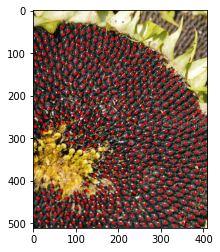

In [20]:
def show_landmarks(image, landmarks):
    """Show image with landmarks"""
    plt.imshow(image)
    plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='.', c='r')
    plt.pause(0.001)  # pause a bit so that plots are updated


plt.figure()
show_landmarks(io.imread(os.path.join('~/Downloads/fuckyou/images', '106.jpg')),
               landmarks)
plt.show()

In [28]:
class SunFlowerDataset(Dataset):

    def __init__(self, xml_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """

        with open(xml_file, "rb") as file:
            xmldict = xmltodict.parse(file)
            annotations = xmldict['annotations']
            images = annotations['image']
            vova_result = []
            for image in images:
                has_points = image.get('points')

                if has_points:
                    final_point_array = []
                    image_name = image.get('@name')
                    image_width = image.get('@width')
                    image_height = image.get('@height')
                    segmented_points = image.get('points')

                    for point_group in segmented_points:

                        if isinstance(point_group, str):
                            continue

                        point_group = point_group.get('@points')

                        if point_group:
                            point_arr = point_group.split(';')
                            point_inner = [group.split(',') for group in point_arr]
                            final_point_array = [*final_point_array, *point_inner]

                    image_object = {
                        "name": image_name,
                        "width": image_width,
                        "height": image_height,
                        "points": final_point_array
                    }
                    vova_result.append(image_object)

        self.landmarks_frame = vova_result
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx) -> T_co:
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.landmarks_frame[idx]["name"])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame[idx]["points"]
        landmarks = np.array([landmarks])
        landmarks = landmarks.astype('float').reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample

0 (536, 800, 3) (500, 2)


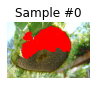

1 (960, 1280, 3) (861, 2)


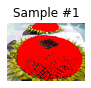

2 (711, 1068, 3) (833, 2)


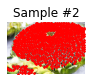

3 (924, 1300, 3) (927, 2)


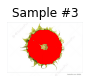

In [35]:
face_dataset = SunFlowerDataset(xml_file='annotations.xml',
                                root_dir='~/Downloads/fuckyou/images')

fig = plt.figure()

for i in range(len(face_dataset)):
    sample = face_dataset[i]

    print(i, sample['image'].shape, sample['landmarks'].shape)

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_landmarks(**sample)

    if i == 3:
        plt.show()
        break